**Julio** Cezar

ˋfor x in range(5): print(x)ˋ

In [1]:
# importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Lendo os dados
# Os Dados abaixo tera que ser baixados do link a baixo:
# Link dos dados: https://download.inep.gov.br/microdados/microdados_enem_2021.zip
df = pd.read_csv('MICRODADOS_ENEM_2021.csv', encoding='unicode_escape', sep=';', nrows=500)
# df.info()
df.head(2)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A


In [9]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [10]:
# Series do Muicipio onde foi a prova
s_mun_pr = df['NO_MUNICIPIO_PROVA']
s_mun_pr.head()

0                Nova Lima
1                   Maceió
2    Ferraz de Vasconcelos
3                    Crato
4                  Acarape
Name: NO_MUNICIPIO_PROVA, dtype: object

In [17]:
# Distribuicao das provas por municipio
s_mun_pr.unique()

array(['Nova Lima', 'Maceió', 'Ferraz de Vasconcelos', 'Crato', 'Acarape',
       'Cascavel', 'Tramandaí', 'Matão', 'Belo Horizonte', 'Ruy Barbosa',
       'Goiânia', 'Nova Cruz', 'Belém', 'Rio de Janeiro', 'Salvador',
       'Sinop', 'São Lourenço da Mata', 'Niquelândia', 'Esperantinópolis',
       'Ananindeua', 'Barreiras', 'Goianésia', 'Porto Velho', 'Aracaju',
       'Curitiba', 'Santo Estêvão', 'Contagem', 'Santa Inês',
       'Pedra Preta', 'Guarulhos', 'Feira de Santana', 'Urandi',
       'São Paulo', 'Guarantã do Norte', 'Juazeiro do Norte',
       'Catolé do Rocha', 'Picos', 'Caeté', 'Catanduva', 'Casa Nova',
       'Varginha', 'Pinheiros', 'Embu das Artes', 'Alegre', 'Arcos',
       'Serrinha', 'Timbaúba', 'São Mateus', 'Mogi das Cruzes',
       'Entre Rios', 'Nova Iguaçu', 'Lagoa Grande', 'Tianguá', 'Vitória',
       'Seropédica', 'Campina Grande', 'Sorocaba', 'Caxias do Sul',
       'Cuiabá', "Sant'Ana do Livramento", 'Brasília', 'São Gonçalo',
       'Recife', 'Ingá', 'São

In [24]:
# so as cidades que comeca com a letra A
s1 = s_mun_pr.value_counts().sort_index().filter(regex='^A[\w.\-]{0,25}', axis=0)
s1.tail(2)

Areia             1
Artur Nogueira    1
Name: NO_MUNICIPIO_PROVA, dtype: int64

In [23]:
# so as cidades que comeca com a letra B
s2 = s_mun_pr.value_counts().sort_index().filter(regex='^B[\w.\-]{0,25}', axis=0)
s2.tail(2)

Brumado       2
Buriticupu    2
Name: NO_MUNICIPIO_PROVA, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


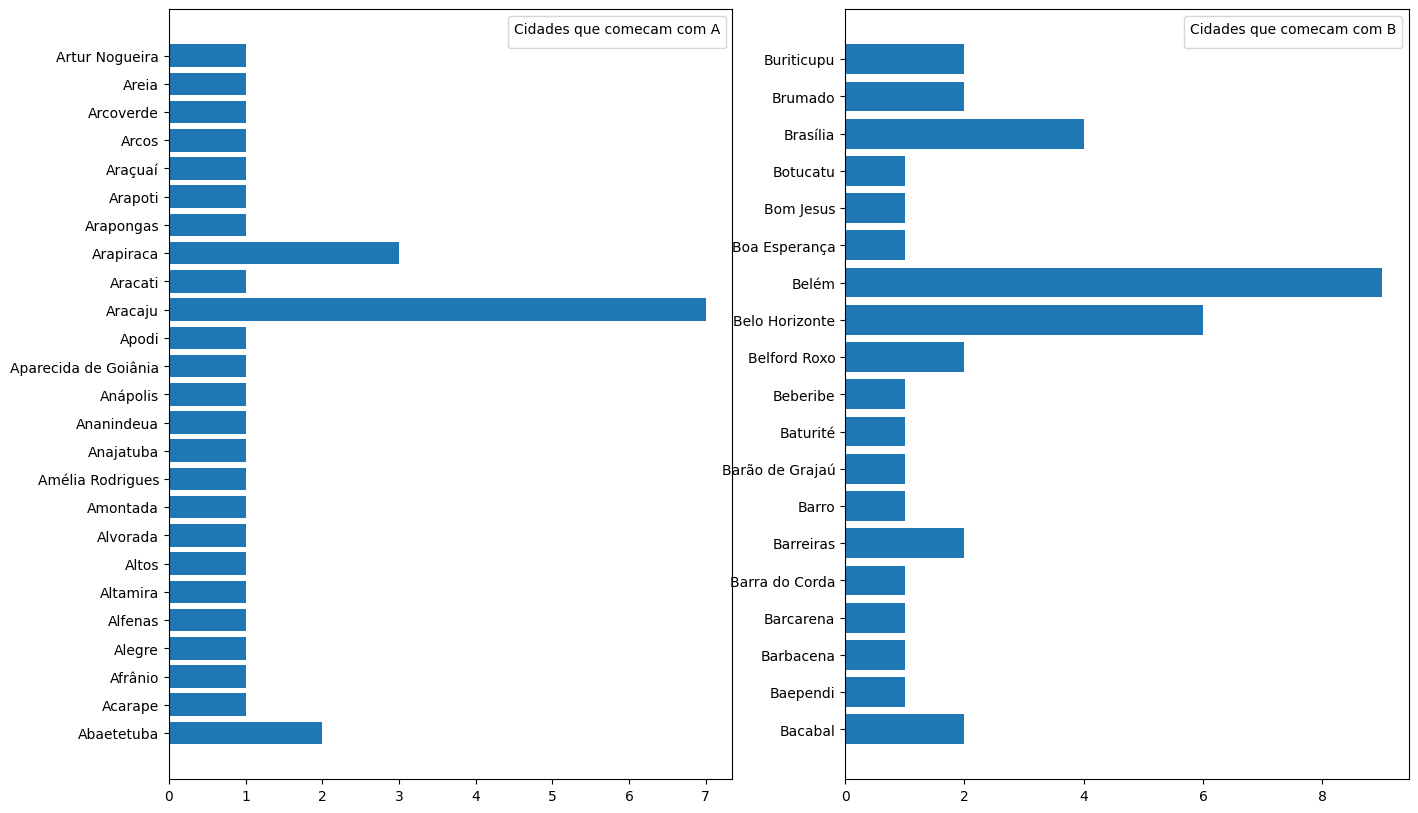

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,10))

ax1.barh(s1.index, s1)
ax1.legend(title='Cidades que comecam com A')

ax2.barh(s2.index, s2)
ax2.legend(title='Cidades que comecam com B')

<AxesSubplot: >

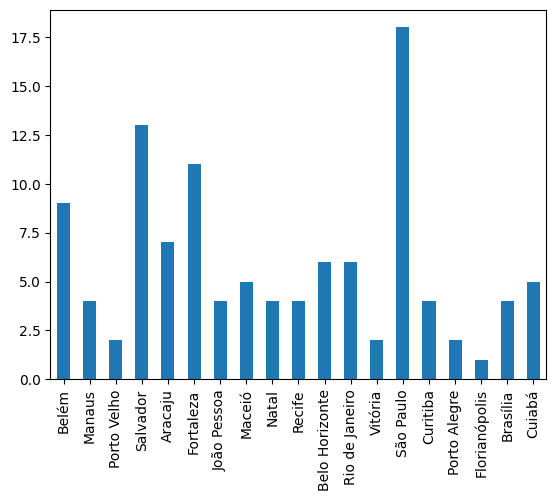

In [54]:
# numero de provas aplicadas nas capitais
# lista de capitais
capitais = pd.Series(pd.read_csv('capitais.csv').capitais).str.strip()
# filtro
s3 = s_mun_pr.value_counts().sort_index().filter(items=capitais, axis=0)
s3.shape
s3.plot.bar()

In [55]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [58]:
faixa_etaria = df['TP_FAIXA_ETARIA']
nota_redacao = df['NU_NOTA_REDACAO']

In [65]:
# criei uma series com os rotulos
labels = pd.Series(pd.read_csv('faixa_etaria.csv')['faixa etaria']).str.strip()
# agrupei por valores unicosna sua frequencia
qtd_faixa = faixa_etaria.value_counts().sort_index()

# filtrei com os valores que tinha relacionado as colunas
s4 = labels.filter(items=qtd_faixa.index, axis=0)

# definir o index
qtd_faixa.index = s4
qtd_faixa.head(2)

faixa etaria
17 anos    13
18 anos    77
Name: TP_FAIXA_ETARIA, dtype: int64

<AxesSubplot: ylabel='Frequency'>

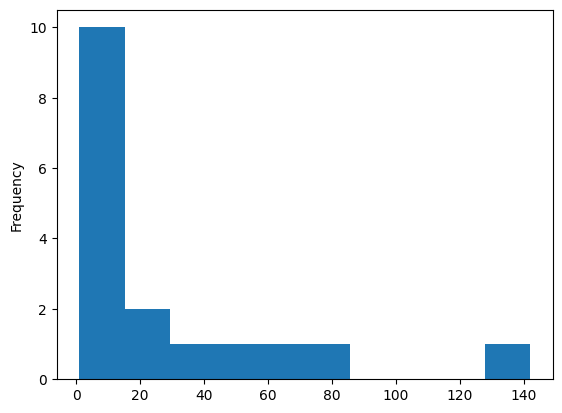

In [66]:
qtd_faixa.plot.hist()

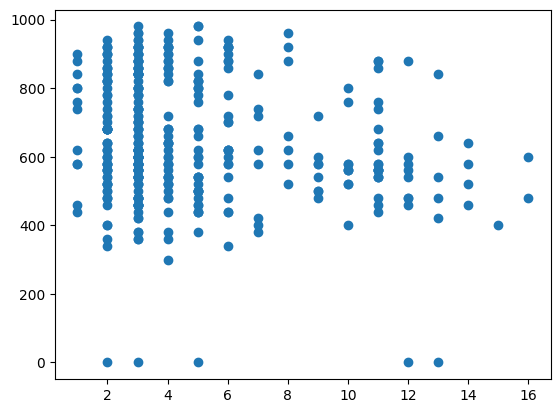

In [69]:
plt.scatter(faixa_etaria, nota_redacao)

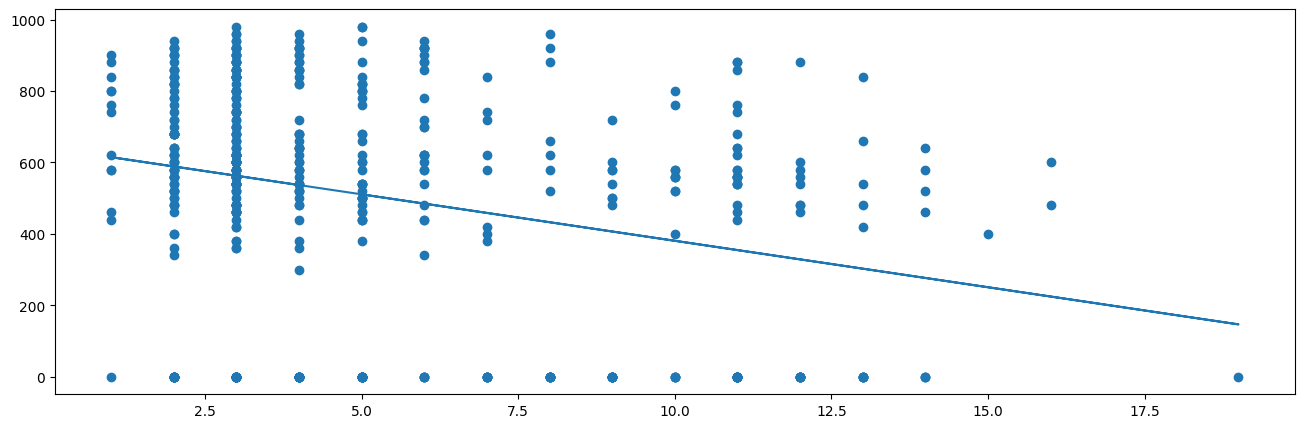

In [83]:
# Regressao Linear

from scipy import stats

x = faixa_etaria.fillna(0)
y = nota_redacao.fillna(0)

# x = [12,20,3,4]
# y = [400, 380, 800, 500]

coef, intercept, r, p, std_err = stats.linregress(x,y)

def mostrar_linha(item):
    return coef * item + intercept

modelo = list(map(mostrar_linha, x))

fig = plt.figure(figsize=(16,5))
plt.scatter(x,y)
plt.plot(x, modelo)
# NAN, nan, NaN

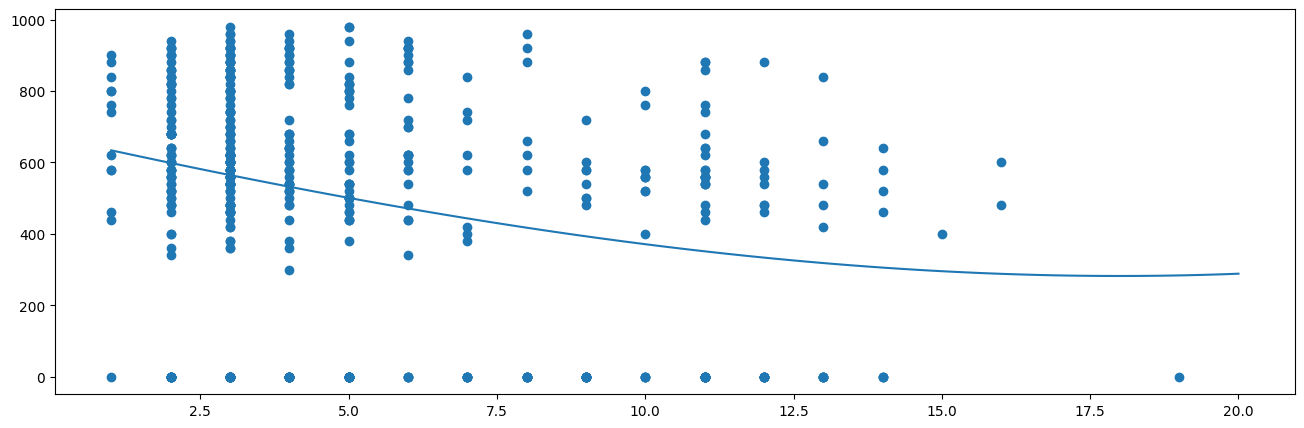

In [84]:

x = faixa_etaria.fillna(0)
y = nota_redacao.fillna(0)

funcao_modelo = np.poly1d(np.polyfit(x,y,3))

linha = np.linspace(1,20,100)

fig = plt.figure(figsize=(16,5))
plt.scatter(x,y)
plt.plot(linha,funcao_modelo(linha))



In [85]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [87]:
faixa_nota = df[['TP_FAIXA_ETARIA', 'NU_NOTA_REDACAO']]
faixa_nota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP_FAIXA_ETARIA  500 non-null    int64  
 1   NU_NOTA_REDACAO  389 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [88]:
faixa_nota.describe()

,TP_FAIXA_ETARIA,NU_NOTA_REDACAO
count,500.000000,389.000000
mean,5.232000,648.791774
std,3.488627,177.612547
min,1.000000,0.000000
25%,3.000000,540.000000
50%,4.000000,620.000000
75%,7.000000,800.000000
max,19.000000,980.000000


In [92]:
# Temos 22% que nao tem notas em redacao
dados_nulos = faixa_nota.isnull().sum()
dados_nulos

TP_FAIXA_ETARIA      0
NU_NOTA_REDACAO    111
dtype: int64

In [102]:
dados_nulos[1]
df2 = faixa_nota.dropna(inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_844\1018476951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2 = faixa_nota.dropna(inplace=True)


(389, 2)

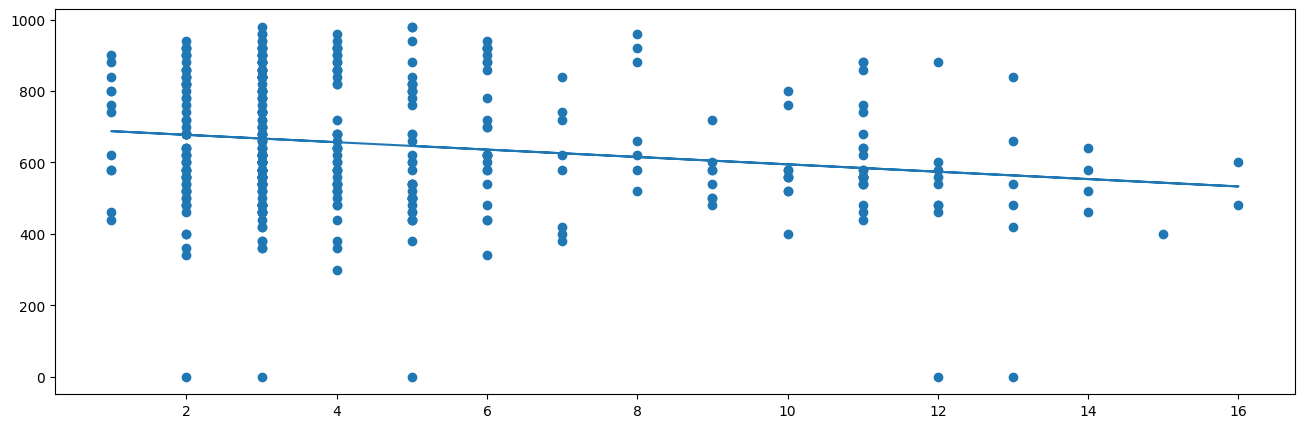

In [108]:
x = faixa_nota.TP_FAIXA_ETARIA
y = faixa_nota.NU_NOTA_REDACAO


def gera_linear(x,y):
    coef, intercept, r, p, std_err = stats.linregress(x,y)

    def mostrar_linha(item):
        return coef * item + intercept

    modelo = list(map(mostrar_linha, x))
    
    return modelo

modelo = gera_linear(x,y)
fig = plt.figure(figsize=(16,5))
plt.scatter(x,y)
plt.plot(x, modelo)

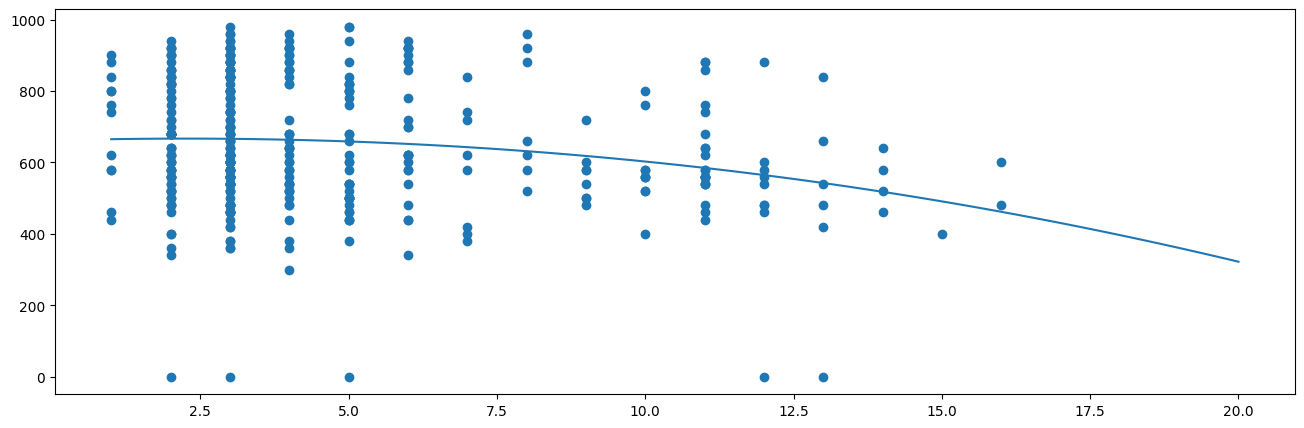

In [107]:
def gera_polinomial(x,y):
    funcao_modelo = np.poly1d(np.polyfit(x,y,3))

    linha = np.linspace(1,20,100)
    
    return funcao_modelo, linha


funcao_modelo, linha = gera_polinomial(x,y)

fig = plt.figure(figsize=(16,5))
plt.scatter(x,y)
plt.plot(linha,funcao_modelo(linha))
    

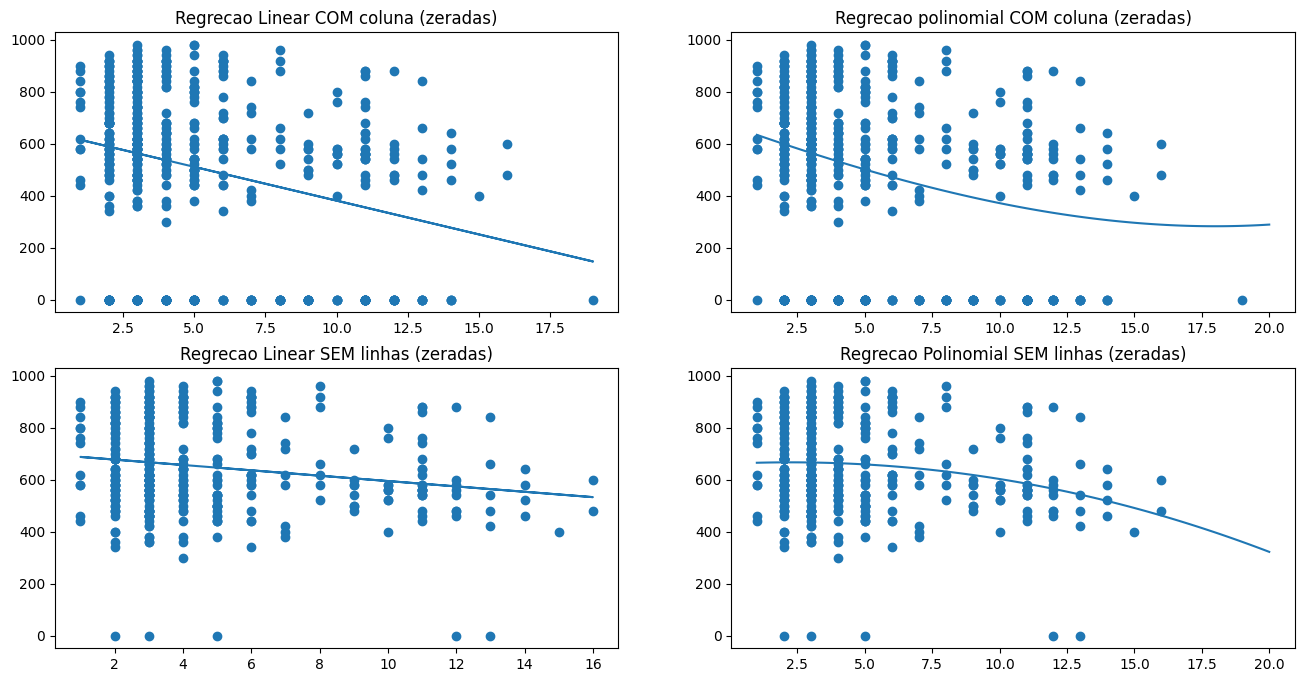

In [136]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(16,8))

# Definindo as variaveis COM linhas zeradas
x1 = faixa_etaria.fillna(0)
y1 = nota_redacao.fillna(0)

# Montando modelos com variaveis COM linhas zeradas
modelo1 = gera_linear(x1,y1)
funcao_modelo1, linha1 = gera_polinomial(x1,y1)

# Grafico Regressao Linear
ax1.set_title('Regrecao Linear COM coluna (zeradas)')
ax1.scatter(x1,y1)
ax1.plot(x1, modelo1)

# Grafico Regressao Polinomial
ax2.set_title('Regrecao polinomial COM coluna (zeradas)')
ax2.scatter(x1,y1)
ax2.plot(linha1,funcao_modelo1(linha1))

# Definindo as variaveis SEM linhas zeradas
x2 = faixa_nota.TP_FAIXA_ETARIA
y2 = faixa_nota.NU_NOTA_REDACAO

# Montando modelos com variaveis SEM linhas zeradas
modelo2 = gera_linear(x2,y2)
funcao_modelo2, linha2 = gera_polinomial(x2,y2)

#Grafico Regressao Linear
ax3.set_title('Regrecao Linear SEM linhas (zeradas)')
ax3.scatter(x2,y2)
ax3.plot(x2, modelo2)

# Grafico Regressao Polinomial
ax4.set_title('Regrecao Polinomial SEM linhas (zeradas)')
ax4.scatter(x2,y2)
ax4.plot(linha2,funcao_modelo2(linha2))
